**Consider the data present in the Insurance dataset file.<br>
Following is the attribute related information:**<br><br>

age: age of primary beneficiary<br>
sex: insurance contractor gender, female, male<br>
bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9<br>
children: Number of children covered by health insurance / Number of dependents<br>
smoker: Smoking, yes or no<br>
region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.<br>
charges: Individual medical costs billed by health insurance<br><br>

**Problem statement:** To predict the approximate insurance cost based upon the rest of the features provided for each individual.

### Import the libraries- Pandas, Numpy, Matplotlib and Seaborn

In [9]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Create a dataframe named "data" from the given datafile and print it's head

In [10]:
#read data into a dataframe
data = pd.read_csv("datasets_insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Understand the problem statement and the data, try understanding importance of each variable given.<br>
### Perform Exploratory Data Analysis- print datatypes, dimension and descriptive statistics.

In [11]:
print(data.dtypes)
print(data.shape)
print(data.describe())

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object
(1338, 7)
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


### Check if there are missing values. If yes, handle them.

In [12]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [13]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Convert Categorical variables to numerical- Sex, Smoker and Region
Hint: Make use of replace function. 
Sex: Female-0,Male-1
Smoker: No-0, Yes-1
Region: northeast-0,northwest-1,southeast-2,southwest-3

Hint: df.Sex.replace/map({"Female":0,"Male":1}, inplace=True)

In [15]:
data.sex.replace({"female":0,"male":1}, inplace=True)
data.smoker.replace({"no":0,"yes":1}, inplace=True)
data.region.replace({"southwest":3,"northwest":1,"northeast":0,"southeast":2}, inplace=True)

### Checking Assumptions for Linear Regression

#### Check for Assumption 1- There should be no outliers in the data.<br>
Hint: Think logically, nothing needs to be worked upon here.

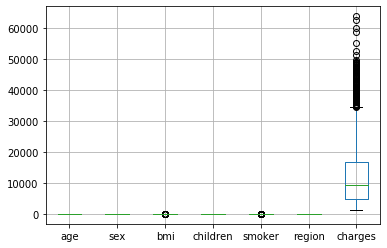

In [16]:
data.boxplot() # outliers check on continuous numerical data

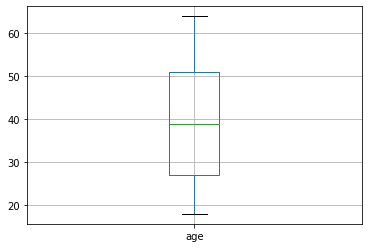

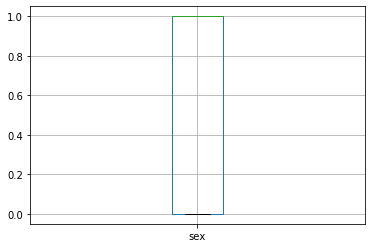

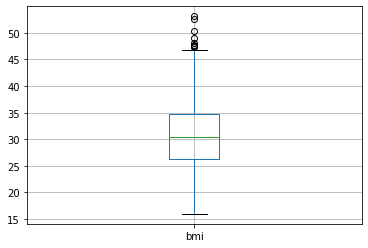

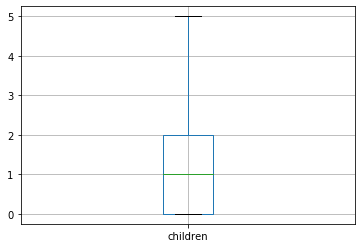

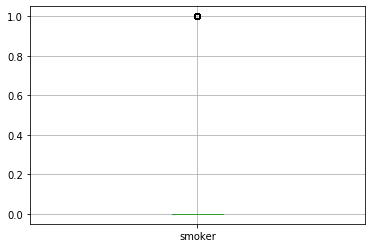

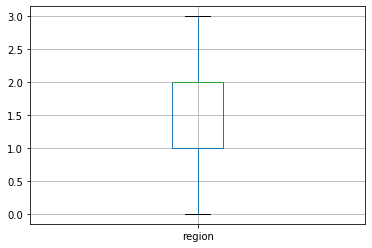

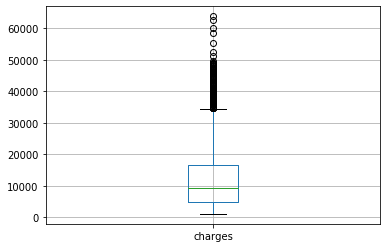

In [17]:
for i in data.columns:     # For Boxplot --> use this method because it will show each boxplot indivisually.
    data.boxplot(column=i)
    plt.show()

In [18]:
data.quantile(0.75)   

age            51.000000
sex             1.000000
bmi            34.693750
children        2.000000
smoker          0.000000
region          2.000000
charges     16639.912515
Name: 0.75, dtype: float64

#### Check for Assumption 2-Assumption of Linearity<br>
Hint: Use kind="scatter" in the pairplot, because it wont be able to fit a line in categorical variables. Some might show no relationship, but remember they are categorical or important variables, leave it as it is.

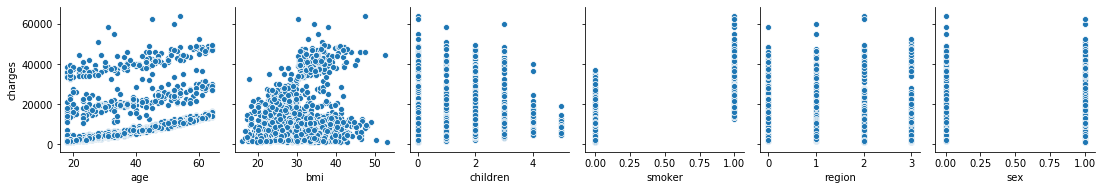

In [65]:
sns.pairplot(data, x_vars=['age' , 'bmi', 'children', 'smoker', 'region', 'sex'],
            y_vars=['charges'], kind='scatter')
plt.show()

### Create X and Y

In [21]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [22]:
#create X and Y
X = data.loc[:,['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
Y = data.loc[:,'charges']

In [23]:
print(X.shape)
print(Y.shape)

(1338, 6)
(1338,)


In [24]:
import warnings
warnings.filterwarnings("ignore")

#### Check for Assumption 3-Assumption of Normality <br>
Hint: You will find the data is highly positively skewed. So log transform the data.

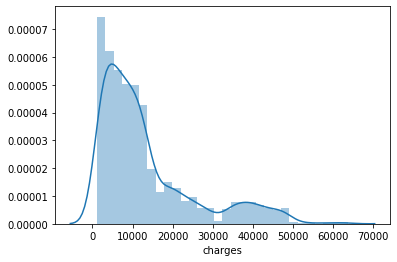

In [25]:
sns.distplot(Y)
plt.show()

In [26]:
# Log transformation
import numpy as np
Y_log = np.log(Y)

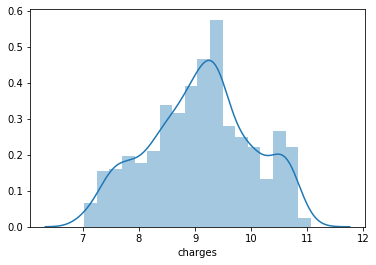

In [27]:
# To see above (Log transformation) code
sns.distplot(Y_log)
plt.show()

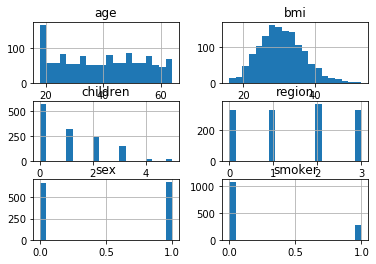

In [28]:
# It is not an assumption, but it is a good practise to use everytime.
X.hist(bins=20)
plt.show()

In [29]:
from scipy.stats import skew
#finding the skewness in each variable
# apply --> used to run on multiple indexes.
data_num_skew = X.apply(lambda i: skew(i.dropna()))   # Just in case if there are missing value, i.dropna will remove it.
#subsetting the variables that are highly skewed
data_num_skewed = data_num_skew[(data_num_skew > .75) | (data_num_skew < -.75)]
 
print(data_num_skew)
print(data_num_skewed)
import numpy as np
# apply log + 1 transformation for all numeric features with skewness over .75
X[data_num_skewed.index] = np.log1p(X[data_num_skewed.index])   # as variable increases for skewness, automatically it will add it.
# .index -> multiple variable which are only highly skewed variable is considered.

age         0.055610
sex        -0.020928
bmi         0.283729
children    0.937328
smoker      1.463124
region     -0.038058
dtype: float64
children    0.937328
smoker      1.463124
dtype: float64


Already done before assumption

Check for the normality in the X variables. <br>
Hint: Some variables make not look normal but realize that they are actually discrete valued.
    No transformation required.

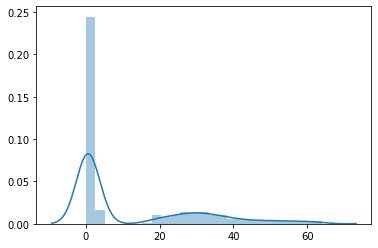

In [30]:
sns.distplot(X)
plt.show()

#### Check for Assumption 4-No multicollinearity in the data<br>
Try both the approaches-correlation and VIF.<br>
Hint: You will find no high correlation. VIF might be high for a few variables but do not eliminate them because they are important as per the domain knowledge.

               age       sex       bmi  children    smoker    region
age       1.000000 -0.020856  0.109272  0.048406 -0.025019  0.002127
sex      -0.020856  1.000000  0.046371  0.016296  0.076185  0.004588
bmi       0.109272  0.046371  1.000000  0.016178  0.003750  0.157566
children  0.048406  0.016296  0.016178  1.000000  0.013245  0.013722
smoker   -0.025019  0.076185  0.003750  0.013245  1.000000 -0.002181
region    0.002127  0.004588  0.157566  0.013722 -0.002181  1.000000


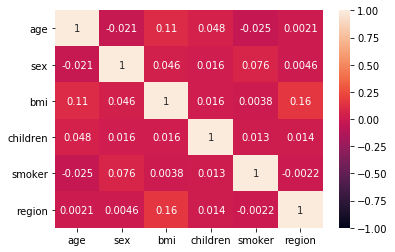

In [31]:
#Assumption of no multicollinearity: There should be no multicollinearity 
#between the independent variables
#multicollinearity is the relationship amongst the multiple independent variables
corr_df=X.corr(method="pearson")     # corelation approach 
print(corr_df)
 
sns.heatmap(corr_df,vmax=1.0,vmin=-1.0,annot=True) 
plt.show()

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
 
vif_df = pd.DataFrame()
vif_df["features"] = X.columns
vif_df["VIF Factor"] = [vif(X.values, i) for i in range(X.shape[1])]  # 1--> is for selecting column.
vif_df.round(2)

,features,VIF Factor
0,age,7.57
1,sex,2.00
2,bmi,10.48
3,children,2.05
4,smoker,1.26
5,region,2.92


### Split the data into Train and Test.<br>
Hint: Make sure you are considering the log transformed Y.

In [34]:
from sklearn.model_selection import train_test_split
 
#Split the data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_log, test_size=0.2,  # Default value -> test_size= 0.25
                                                    random_state=10)  

# By default it will split in 75% for training and 25% testing

In [35]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(1070, 6)
(1070,)
(268, 6)
(268,)


### Build a base Linear Regression model using sklearn.

In [37]:
from sklearn.linear_model import LinearRegression
#create a model object
lm = LinearRegression()
#train the model object
lm.fit(X_train,Y_train)      # fit is the function that is used for training the data

# print intercept and cofficients
print(lm.intercept_)    # It will give the Best fit line Y, beta 0
print(lm.coef_)         # It will give the slope coeffient

6.984901209179281
[ 0.03490442 -0.07046538  0.01261145  0.21604059  2.26030833 -0.038601  ]


Create a zipped list of the slope coefficients to understand the equation better.<br>
Write down the equation manually and try making sense out of it.

In [38]:
print(list(zip(X.columns, lm.coef_)))

[('age', 0.03490441966039544), ('sex', -0.07046538108862868), ('bmi', 0.012611453690896487), ('children', 0.21604058960658104), ('smoker', 2.2603083293173825), ('region', -0.03860099961318558)]


### Predict using the model.

In [39]:
#predict using the model           
# Predict for the testing Part.
Y_pred = lm.predict(X_test)          # 40 observations from the X_test
print(Y_pred)

[ 8.88710131  8.54191825  9.47562645  9.35316407  8.28680452  8.96469368
  9.10160992  9.66075329  8.98326118 10.54265904  8.14569451  8.25543681
  8.74360201  9.13361101  9.26293858  9.34368168  8.35872094  9.79904298
  9.16677725 10.2409052  10.56207364  8.05277678  7.94505117  8.80486837
  8.45669744  9.40103004  9.03965707  9.40140263  8.44526968 10.23328361
  7.71152359 10.4091607   8.87931621  8.96672967  8.49029993  8.91327915
  9.41850469  9.076503    9.07517157  8.91732597  9.57140972  9.17829018
  8.52873928  8.9807615   7.98434859  8.85360062  8.94670527 10.59991978
  9.28529949  9.2244315  10.04331678  8.30258819  8.94408563  9.64806191
  9.08253714  9.36454702  9.3378595   8.66570377  8.74267183 10.68544038
  7.86380299 10.6358738  11.05226201  7.94362248 10.01697593  8.85723621
  8.50040942  8.93004525  8.90145558  8.96328989  8.80208651  7.99398326
  8.8841596   8.91670642  9.01263994  9.35309154  8.54159301  8.81305793
  7.79660774  9.31402124  9.24746985  9.22074115  9

In [41]:
# Manually Comparing Yact and Ypred    
# This is not Required.
new_df=pd.DataFrame()
new_df=X_test.copy()
 
new_df["Actual charges"]=Y_test
new_df["Predicted charges"]=Y_pred
# It will sort the index value. 
new_df=new_df.reset_index().drop("index", axis=1)    # drop index will drop the index column.

In [42]:
new_df

,age,sex,bmi,children,smoker,region,Actual charges,Predicted charges
0,37,0,27.740,1.386294,0.000000,1,8.893093,8.887101
1,36,0,26.885,0.000000,0.000000,1,8.569372,8.541918
2,59,1,37.100,0.693147,0.000000,3,9.421182,9.475626
3,61,0,25.080,0.000000,0.000000,2,10.106963,9.353164
4,29,0,26.030,0.000000,0.000000,1,8.225895,8.286805
...,...,...,...,...,...,...,...,...
263,50,1,34.200,1.098612,0.693147,3,10.665620,10.779237
264,26,0,40.185,0.000000,0.000000,1,8.071295,8.360606
265,19,1,27.265,1.098612,0.000000,1,10.020989,8.120215
266,57,1,40.945,0.000000,0.000000,0,9.355851,9.420364


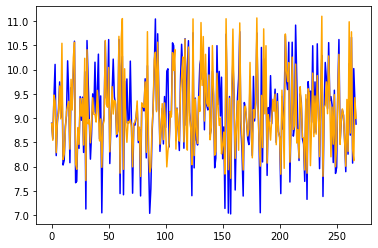

In [44]:
new_df['Actual charges'].plot(color='blue')
new_df['Predicted charges'].plot(color='orange')
plt.show()

### Evaluate the model.

In [45]:
# It will give R squared based on training data.
lm.score(X_train, Y_train)

0.7812597482380355

In [46]:
# Mean squared error
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.7087874372784458
RMSE: 0.4850501732235958
Adj R-square: 0.7074746834269587


In [47]:
print(Y_test.min())
print(Y_test.max())

7.02275569117477
11.044406702204412


In [48]:
# Residual --> means Error
# To client we will send TV, Radio, Newspaper (Independent variable) and Predicted Sales (Dependent variable).
new_df["Residual"]=new_df["Actual charges"]-new_df["Predicted charges"]
new_df.to_excel("Insurance Data Prediction.xlsx",header=True,index=True)
new_df.head()

,age,sex,bmi,children,smoker,region,Actual charges,Predicted charges,Residual
0,37,0,27.740,1.386294,0.0,1,8.893093,8.887101,0.005992
1,36,0,26.885,0.000000,0.0,1,8.569372,8.541918,0.027453
2,59,1,37.100,0.693147,0.0,3,9.421182,9.475626,-0.054444
3,61,0,25.080,0.000000,0.0,2,10.106963,9.353164,0.753799
4,29,0,26.030,0.000000,0.0,1,8.225895,8.286805,-0.060909


### Perform Ridge and Lasso regression. Evaluate them as well.<br>
Hint:Look at the fun in the Lasso Regression, ignore such model.

In [49]:
from sklearn.linear_model import Ridge
#create a model object
rid = Ridge()
#train the model object
rid.fit(X_train,Y_train)      # fit is the function that is used for training the data

# print intercept and cofficients
print(rid.intercept_)    # It will give the Best fit line Y, beta 0
print(rid.coef_)         # It will give the slope coeffient

6.9884970295592375
[ 0.03489726 -0.06894692  0.01261569  0.21531526  2.23319248 -0.03859084]


In [51]:
Y_pred=rid.predict(X_test)
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.7093674247432682
RMSE: 0.48456691242244737
Adj R-square: 0.7080572854107811


In [52]:
from sklearn.linear_model import Lasso
las = Lasso()
las.fit(X_train,Y_train)      # fit is the function that is used for training the data


# print intercept and cofficients
print(las.intercept_)    # It will give the Best fit line Y, beta 0
print(las.coef_) 

7.895875452206857
[ 0.03043079  0.          0.          0.          0.         -0.        ]


In [53]:
Y_pred=las.predict(X_test)
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.21387850856962531
RMSE: 0.7969415049819164
Adj R-square: 0.21033476029871445


### Create a sample dataframe named "new_df" to hold just the training data for the statsmodels model.

In [54]:
new_df=pd.DataFrame()
new_df=X_train.copy()

new_df["charges"]=Y_train.copy()
new_df.shape

(1070, 7)

### Build OLS model using statsmodels library. Check the summary to evaluate.<br>
Hint: No high p-values. <br>
Check for the Assumption 5- No autocorrelation 

In [61]:
import statsmodels.formula.api as sm

# Output is in Training Data
# create a fitted model with all three features
lm_model = sm.ols(formula='charges ~ age + bmi + sex + children + region + smoker', 
                  data=new_df).fit()
 
# print the coefficients
print(lm_model.params)  # params ---> It will give Equation from the best fit line
print(lm_model.summary()) # used to summaries the information 

Intercept    6.984901
age          0.034904
bmi          0.012611
sex         -0.070465
children     0.216041
region      -0.038601
smoker       2.260308
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     632.8
Date:                Mon, 27 Nov 2023   Prob (F-statistic):               0.00
Time:                        21:19:53   Log-Likelihood:                -620.37
No. Observations:                1070   AIC:                             1255.
Df Residuals:                    1063   BIC:                             1290.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err         

### Predict using the model. Evaluate the model.

In [62]:
Y_pred=lm_model.predict(X_test)

from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.7087874372784464
RMSE: 0.4850501732235952
Adj R-square: 0.7074746834269593


#### Check for Assumption 6-Errors should be random.<br>
Hint: Diagnostic plot

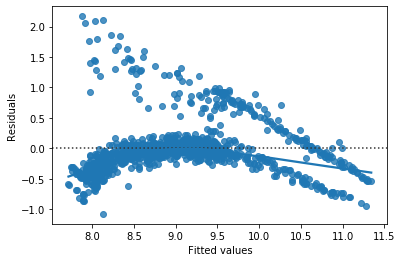

In [59]:
#Assumption: Errors should be random
#checked using Residual v/s Fitted plot
model_fitted_y = lm_model.fittedvalues
sns.residplot(x=model_fitted_y, y='charges', data=new_df, lowess=True)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

#### Check for Assumption 7-Errors should follow normal distribution.<br>
Hint: Diagnostic plot

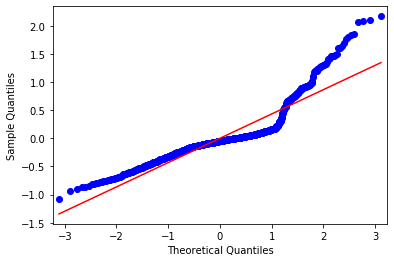

In [63]:
import statsmodels.api as sma
sma.qqplot(lm_model.resid, line='s')
plt.show()

#### Check for Assumption 8-Errors should follow constant variance.<br>
Hint: Diagnostic plot

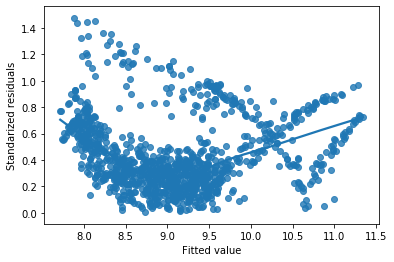

In [64]:
# Error should Follows the constant varaince It is Homoskedasticity      (Constant Line)
# Error Follows it is not constant varaince It is Hetroskedasticity  (Not constant Line)


#Assumption: Errors should follow a constant variance-->Homoskedasticity
#checked using Scale location plot
model_norm_residuals_abs_sqrt=np.sqrt(np.abs(lm_model.resid))
 
sns.regplot(x=lm_model.fittedvalues,
            y=model_norm_residuals_abs_sqrt,
              scatter=True, lowess=True)        
plt.ylabel("Standarized residuals")
plt.xlabel("Fitted value")
plt.show()

## Conclusion:
            Performed Base Linear Regression and Tuned using Ridge & Lasso Techniques. Out of Both, Ridge is giving the lowest RMSE (0.48) and R-Squared (0.709), Adj-R Squared (0.709) are Closed to each other.